# Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV    # Train test Split and Grid Search
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as SM
from sklearn import metrics

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML('<style>.container { width:90% !important; }<\style>'))

# Loading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_excel('CompData.xlsx')
df.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


# Data Overview

In [ ]:
df.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


In [ ]:
df.tail()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
2053,2743,Kothari Ferment.,3.021580e-04,6.490000e+09,0.477066,0.000000,0.183014,0.322063,0.192739,0.022127,...,0.320387,0.004430,0,0.000420,0.624567,0.026791,0.565158,1,0.171662,0
2054,21216,Firstobj.Tech.,1.371450e-04,0.000000e+00,0.465211,0.000658,0.000000,0.319764,0.169391,0.022072,...,0.312324,0.032284,0,0.000882,0.624008,0.024201,0.573670,1,0.053740,0
2055,142,Diamines & Chem.,2.114990e-04,8.370000e+09,0.480248,0.000502,0.000000,0.327828,0.155005,0.021861,...,0.313122,0.040998,0,0.009579,0.623718,0.026702,0.564697,1,0.054984,0
2056,18014,IL&FS Engg.,3.750000e+09,0.000000e+00,0.474670,0.000578,0.306205,0.322027,0.173834,0.022167,...,0.315632,0.020275,0,0.004958,0.623443,0.026943,0.565792,1,0.057553,0
2057,43229,Channel Nine,2.981110e-04,0.000000e+00,0.467203,0.000826,0.000000,0.330021,0.180236,0.022418,...,0.316734,0.031368,0,0.000186,0.623588,0.026871,0.565512,1,0.020266,0


In [ ]:
df.shape

(2058, 58)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

In [ ]:
for col in df.columns:
    if col.startswith('_'):
        df.rename(columns={col: col[1:]}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Co_Code                                           2058 non-null   int64  
 1   Co_Name                                           2058 non-null   object 
 2   Operating_Expense_Rate                            2058 non-null   float64
 3   Research_and_development_expense_rate             2058 non-null   float64
 4   Cash_flow_rate                                    2058 non-null   float64
 5   Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   Tax_rate_A                                        2058 non-null   float64
 7   Cash_Flow_Per_Share                               1891 non-null   float64
 8   Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   Realized_Sales_Gros

In [ ]:
# checking for duplicate values
df.duplicated().sum()

0

In [ ]:
#checking for no. of unique values
df.nunique()

Co_Code                                             2058
Co_Name                                             2058
Operating_Expense_Rate                              1495
Research_and_development_expense_rate                629
Cash_flow_rate                                      1888
Interest_bearing_debt_interest_rate                  813
Tax_rate_A                                           985
Cash_Flow_Per_Share                                  900
Per_Share_Net_profit_before_tax_Yuan_                876
Realized_Sales_Gross_Profit_Growth_Rate             1939
Operating_Profit_Growth_Rate                        2015
Continuous_Net_Profit_Growth_Rate                   2014
Total_Asset_Growth_Rate                              922
Net_Value_Growth_Rate                               1757
Total_Asset_Return_Growth_Rate_Ratio                1428
Cash_Reinvestment_perc                              1690
Current_Ratio                                       1972
Quick_Ratio                    

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,2058.0,1.757211e+04,2.189289e+04,4.000000,3.674000e+03,6.240000e+03,2.428075e+04,7.249300e+04
Operating_Expense_Rate,2058.0,2.052389e+09,3.252624e+09,0.000100,1.578727e-04,3.330330e-04,4.110000e+09,9.980000e+09
Research_and_development_expense_rate,2058.0,1.208634e+09,2.144568e+09,0.000000,0.000000e+00,1.994130e-04,1.550000e+09,9.980000e+09
Cash_flow_rate,2058.0,4.652426e-01,2.266269e-02,0.000000,4.600991e-01,4.634450e-01,4.680691e-01,1.000000e+00
Interest_bearing_debt_interest_rate,2058.0,1.113022e+07,9.042595e+07,0.000000,2.760280e-04,4.540450e-04,6.630660e-04,9.900000e+08
Tax_rate_A,2058.0,1.147770e-01,1.524457e-01,0.000000,0.000000e+00,3.709890e-02,2.161909e-01,9.996963e-01
Cash_Flow_Per_Share,1891.0,3.199856e-01,1.529979e-02,0.169449,3.149890e-01,3.206479e-01,3.259178e-01,4.622268e-01
Per_Share_Net_profit_before_tax_Yuan_,2058.0,1.769673e-01,3.015730e-02,0.000000,1.666039e-01,1.756421e-01,1.858854e-01,7.923477e-01
Realized_Sales_Gross_Profit_Growth_Rate,2058.0,2.276117e-02,2.170104e-02,0.004282,2.205831e-02,2.210001e-02,2.215200e-02,1.000000e+00
Operating_Profit_Growth_Rate,2058.0,8.481083e-01,4.589093e-03,0.736430,8.479740e-01,8.480386e-01,8.481147e-01,1.000000e+00


* We can see that `Co_Code` and `Co_Name` are not relevant for this exercise
* So we will drop these variables

In [ ]:
df.drop(['Co_Code', 'Co_Name'], axis = 1, inplace = True)

#Exploratory Data Analysis

## Univariate Analysis

In [ ]:
df["Default"].unique()

array([0, 1], dtype=int64)

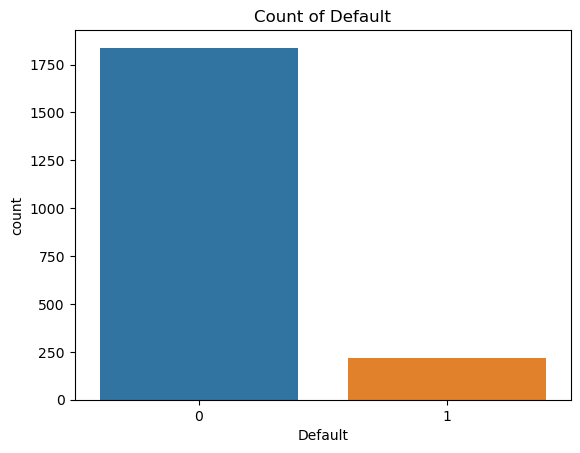

In [ ]:
#Plotting a countplot for the target variable
sns.countplot(x = "Default", data = df)
plt.title('Count of Default')
plt.show()

In [ ]:
#Percentage of defaulters
(df.Default.sum()/len(df)) * 100

10.689990281827017

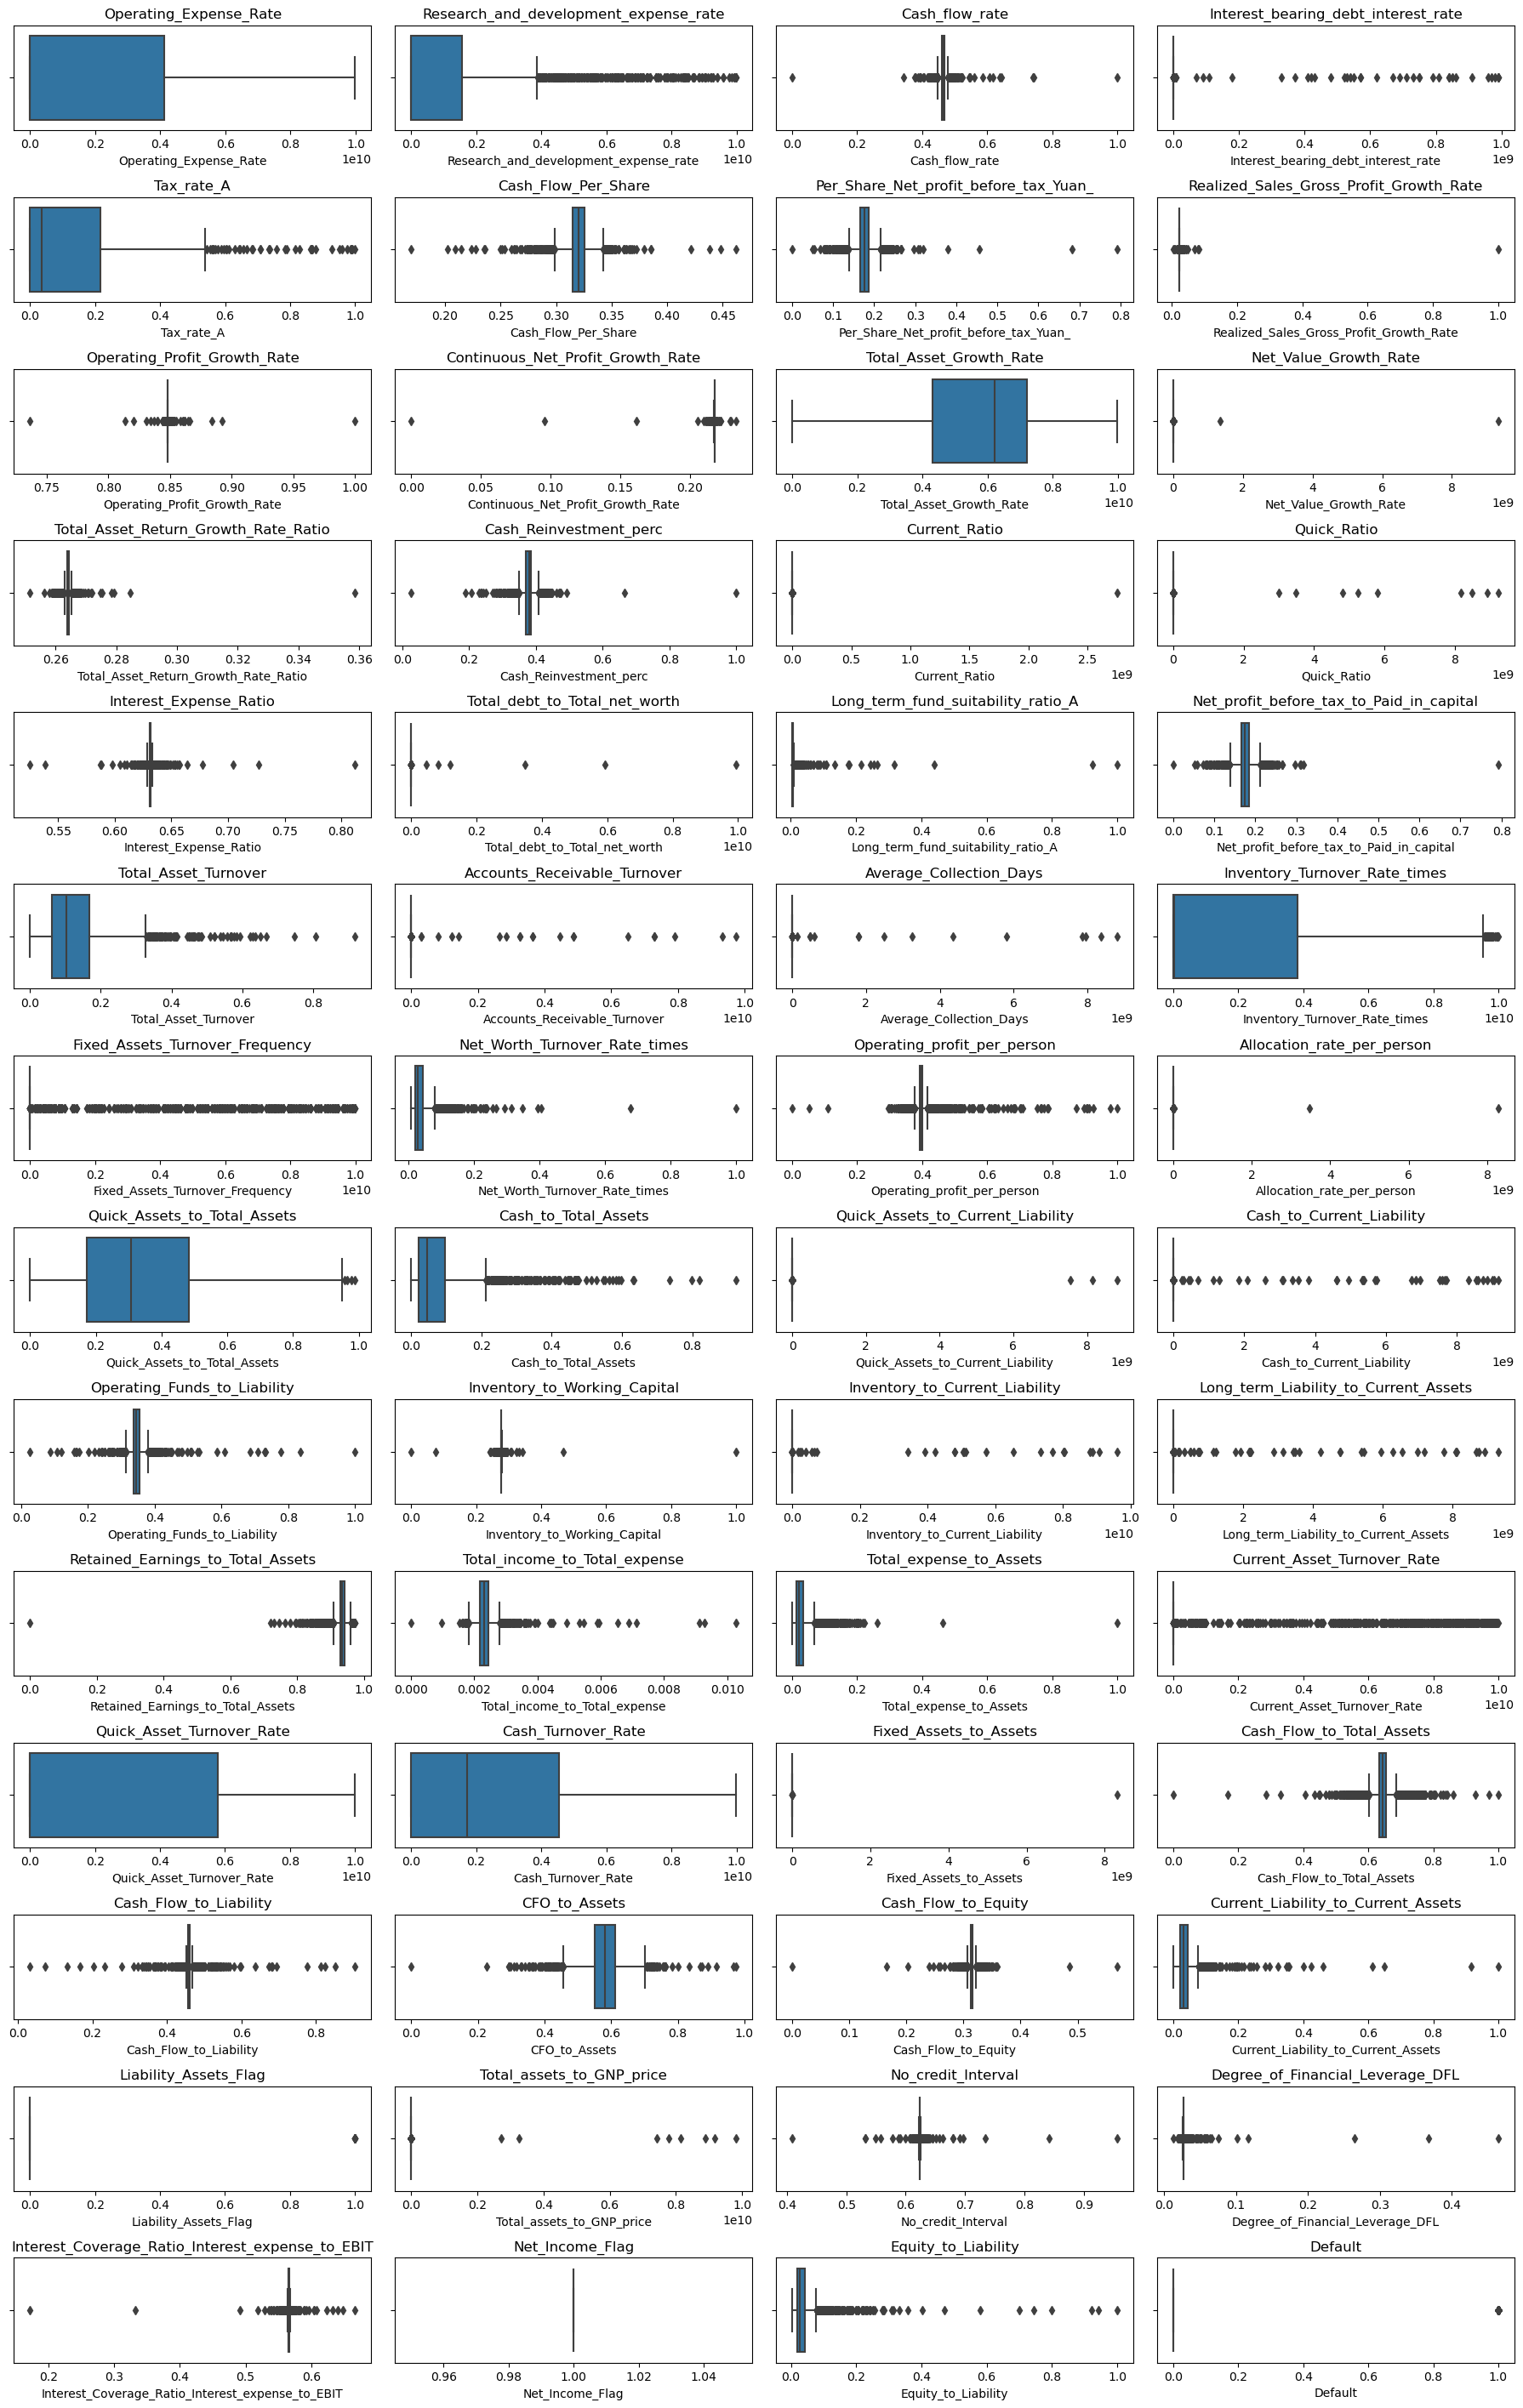

In [ ]:
#Get boxplots for all the numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(15, 4, i + 1)
    sns.boxplot(data= df, x= variable)
    plt.tight_layout()
    plt.title(variable)


## Bivariate Analysis

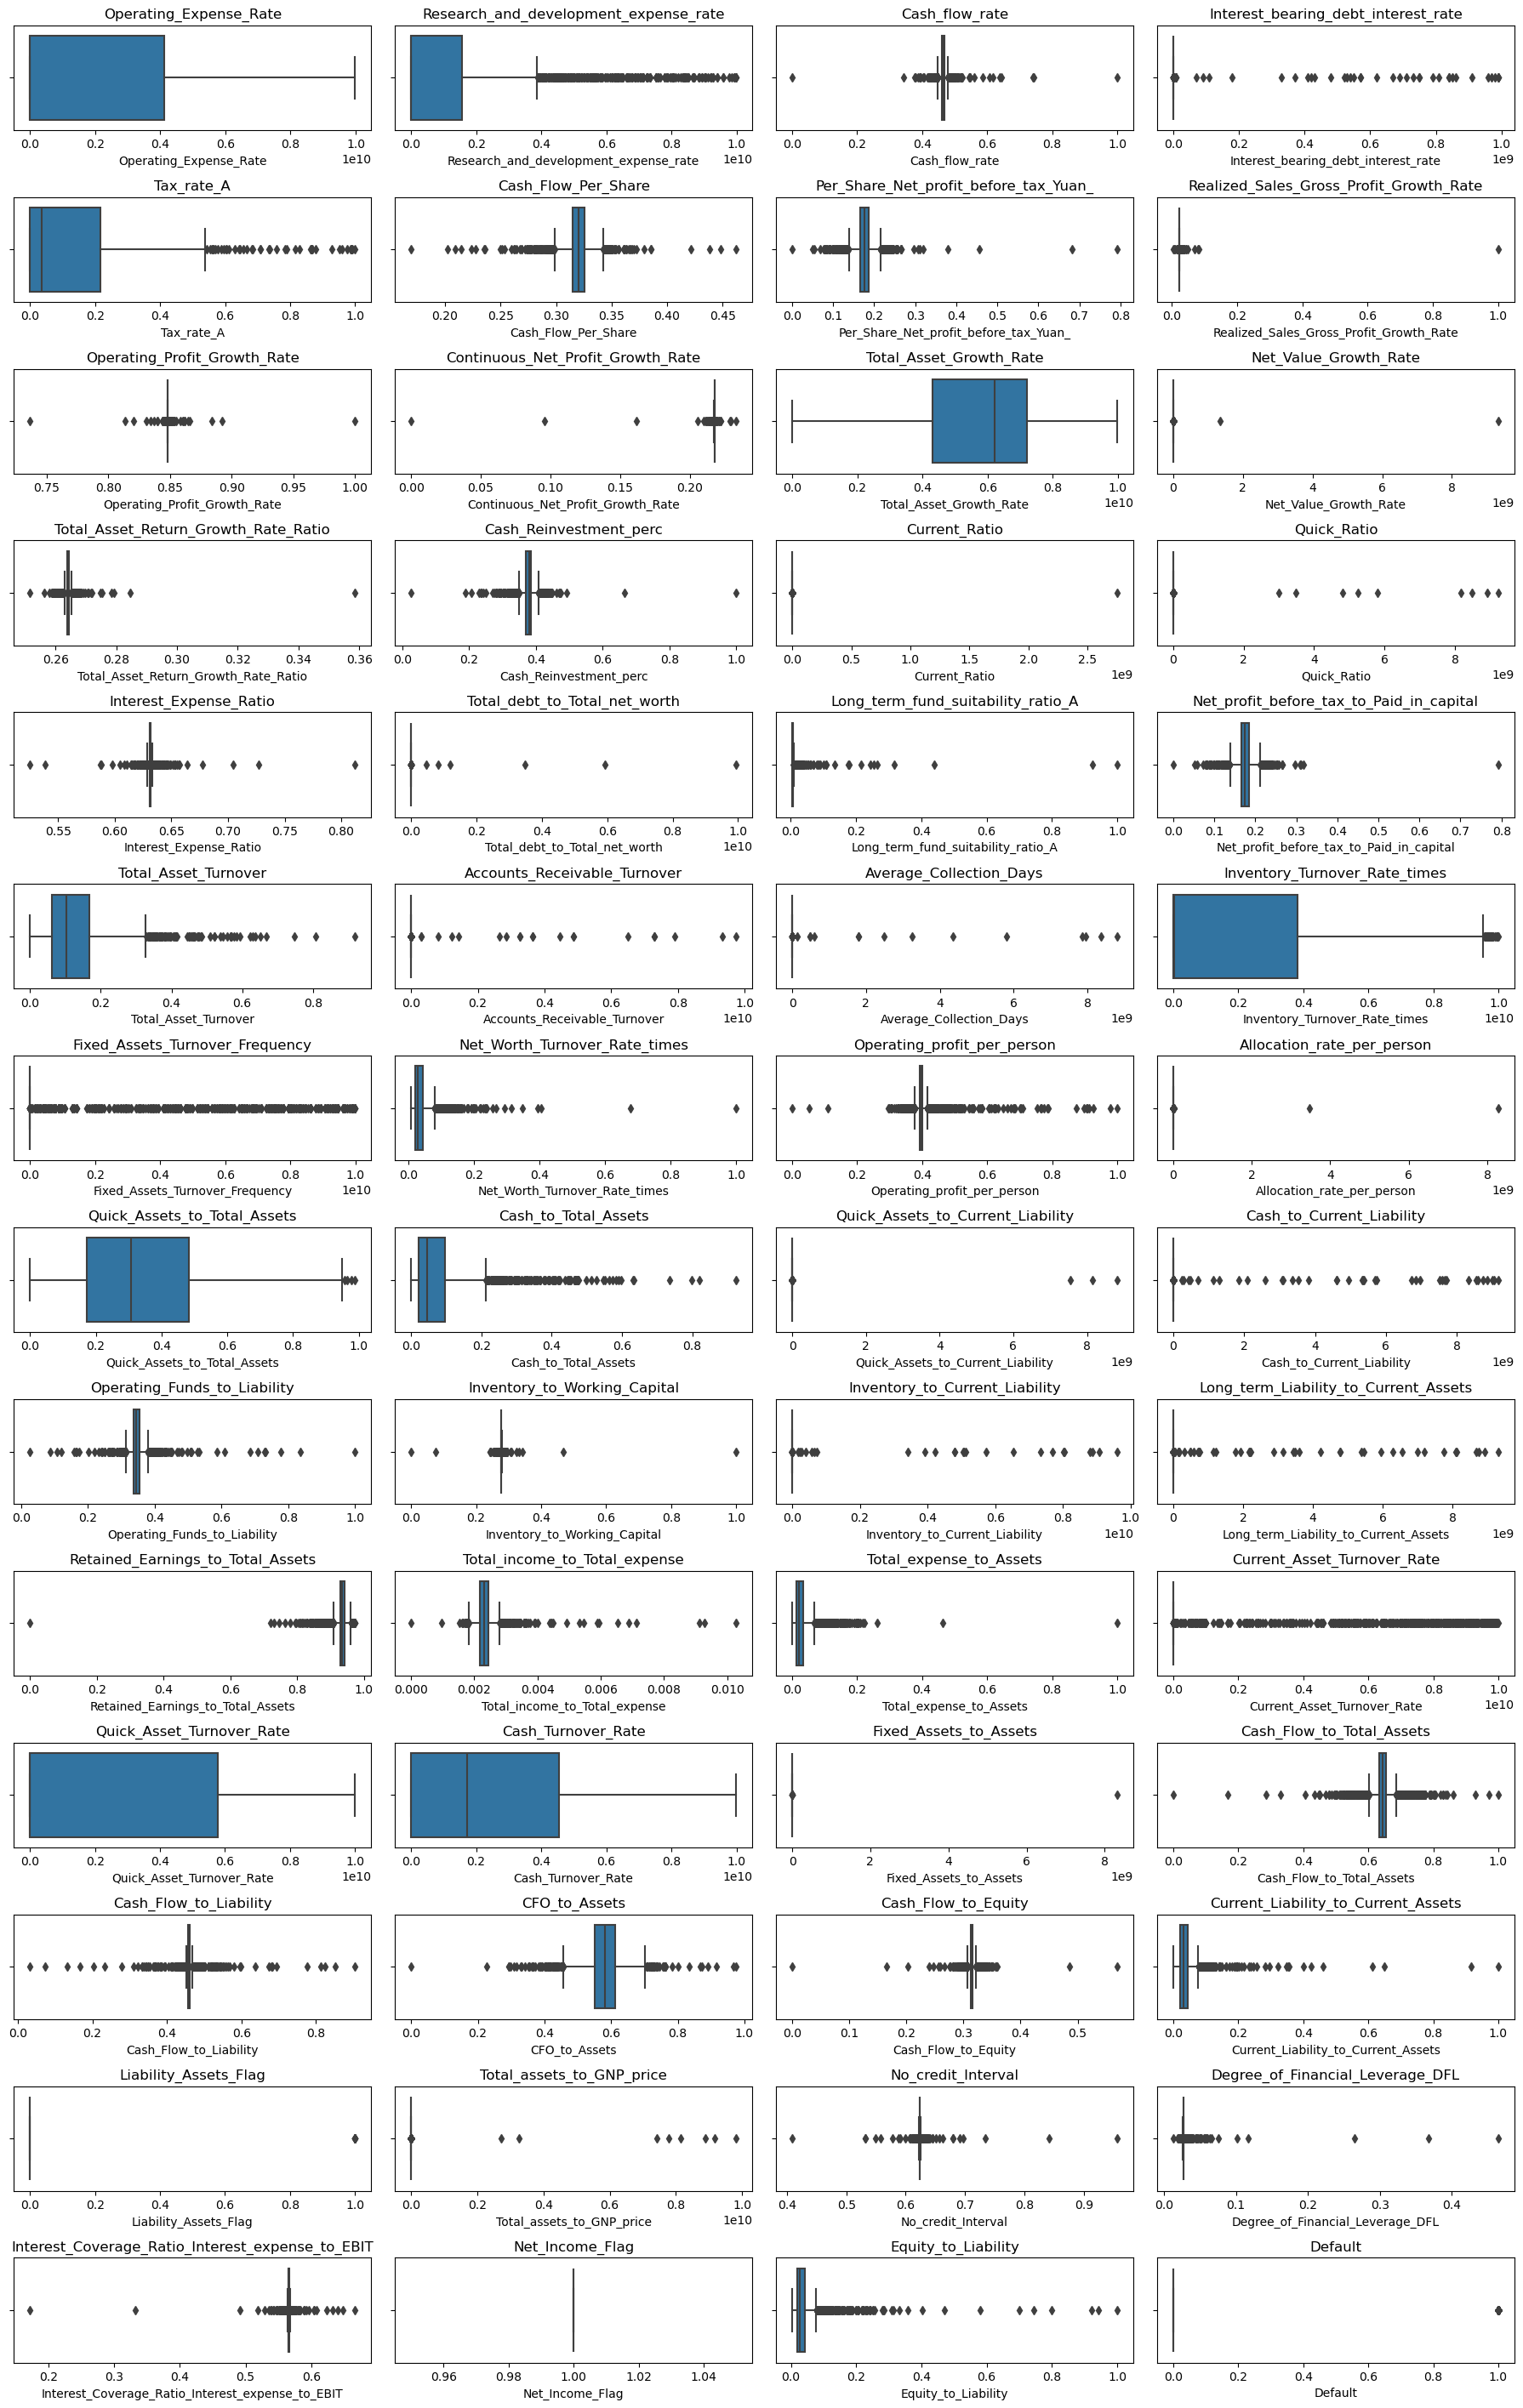

In [ ]:
#Get boxplots for all the numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(15, 4, i + 1)
    sns.boxplot(df,x= variable)
    plt.tight_layout()
    plt.title(variable)


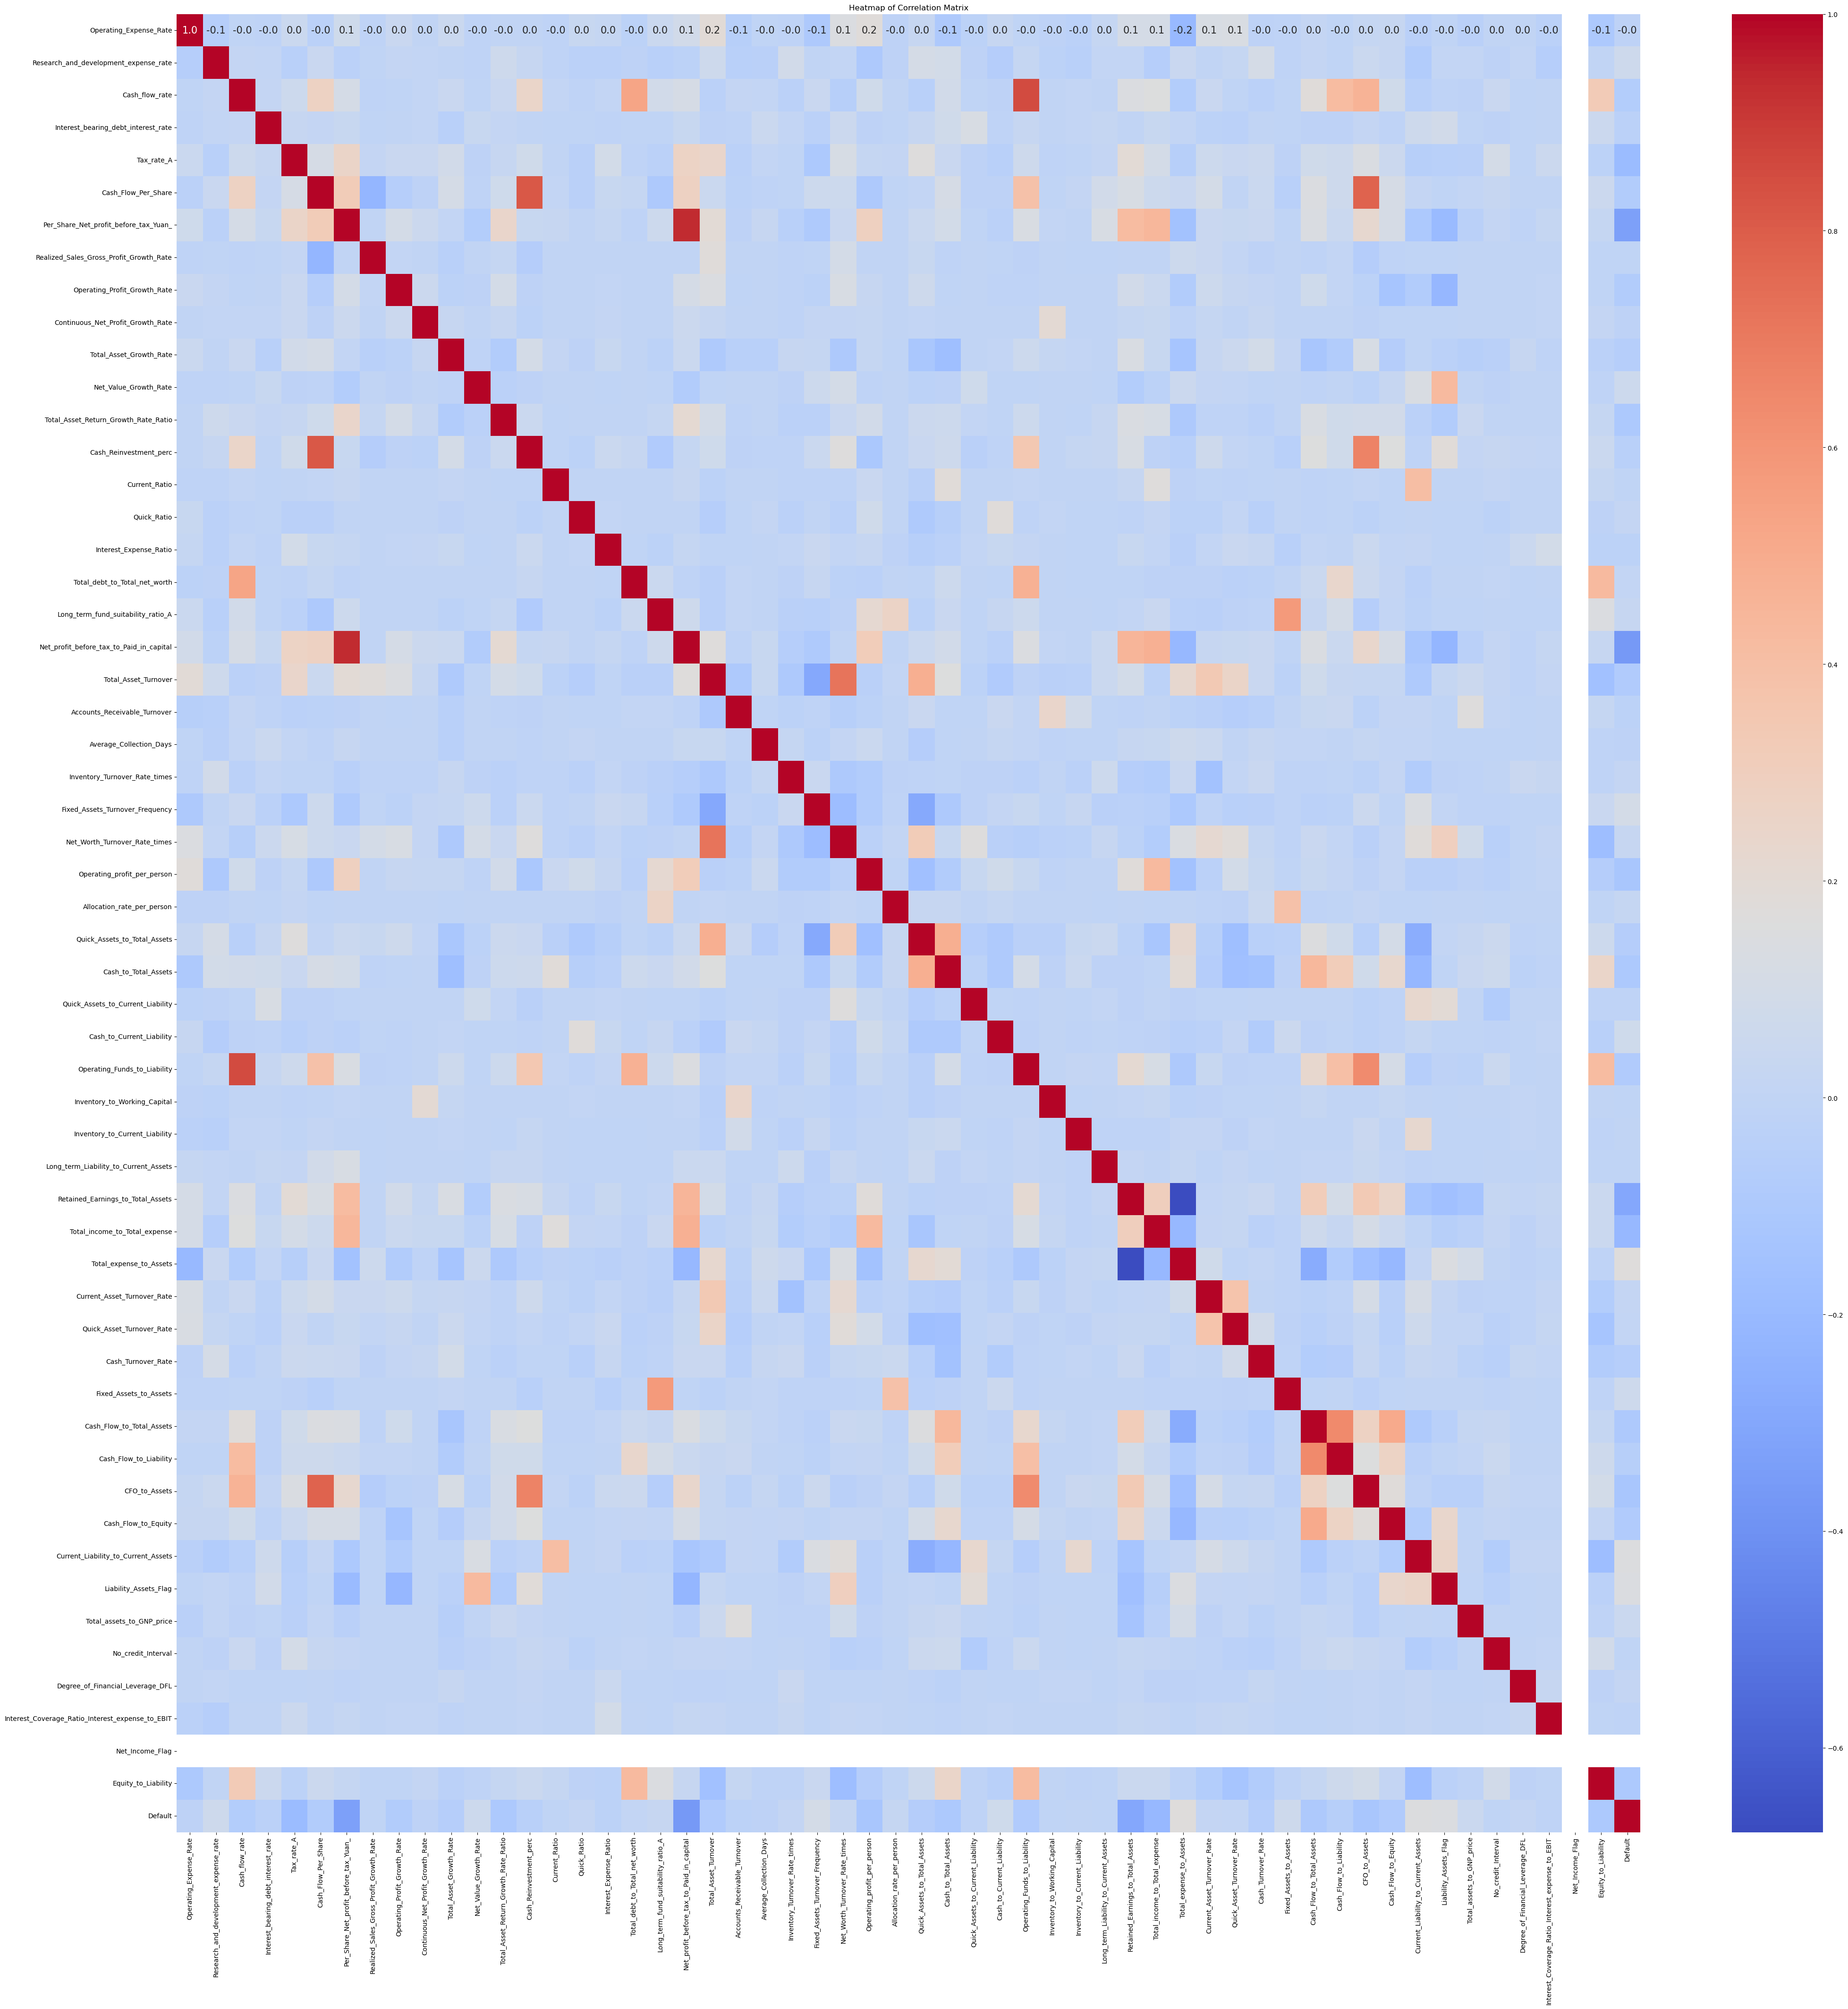

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"size": 15})
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Data Preprocessing

## Dropping columns with few unique values

In [ ]:
df.nunique()

Operating_Expense_Rate                              1495
Research_and_development_expense_rate                629
Cash_flow_rate                                      1888
Interest_bearing_debt_interest_rate                  813
Tax_rate_A                                           985
Cash_Flow_Per_Share                                  900
Per_Share_Net_profit_before_tax_Yuan_                876
Realized_Sales_Gross_Profit_Growth_Rate             1939
Operating_Profit_Growth_Rate                        2015
Continuous_Net_Profit_Growth_Rate                   2014
Total_Asset_Growth_Rate                              922
Net_Value_Growth_Rate                               1757
Total_Asset_Return_Growth_Rate_Ratio                1428
Cash_Reinvestment_perc                              1690
Current_Ratio                                       1972
Quick_Ratio                                         1970
Interest_Expense_Ratio                              1716
Total_debt_to_Total_net_worth  

We can drop the columns `Net_Income_Flag` and `Liability_Assets_Flag` as they have very few unique values.

In [ ]:
df.drop(['Net_Income_Flag', 'Liability_Assets_Flag'], axis = 1, inplace = True)
df.nunique()

Operating_Expense_Rate                              1495
Research_and_development_expense_rate                629
Cash_flow_rate                                      1888
Interest_bearing_debt_interest_rate                  813
Tax_rate_A                                           985
Cash_Flow_Per_Share                                  900
Per_Share_Net_profit_before_tax_Yuan_                876
Realized_Sales_Gross_Profit_Growth_Rate             1939
Operating_Profit_Growth_Rate                        2015
Continuous_Net_Profit_Growth_Rate                   2014
Total_Asset_Growth_Rate                              922
Net_Value_Growth_Rate                               1757
Total_Asset_Return_Growth_Rate_Ratio                1428
Cash_Reinvestment_perc                              1690
Current_Ratio                                       1972
Quick_Ratio                                         1970
Interest_Expense_Ratio                              1716
Total_debt_to_Total_net_worth  

## Outliers Check

In [ ]:
outliers_count = {}

# Iterate over each column in the DataFrame
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = len(outliers)

print("Number of outliers in each column:")
pd.DataFrame([{'Column': column, 'No. of outliers': outliers} for column, outliers in outliers_count.items()])

Number of outliers in each column:


,Column,No. of outliers
0,Operating_Expense_Rate,0
1,Research_and_development_expense_rate,264
2,Cash_flow_rate,206
3,Interest_bearing_debt_interest_rate,94
4,Tax_rate_A,42
5,Cash_Flow_Per_Share,146
6,Per_Share_Net_profit_before_tax_Yuan_,186
7,Realized_Sales_Gross_Profit_Growth_Rate,283
8,Operating_Profit_Growth_Rate,317
9,Continuous_Net_Profit_Growth_Rate,340


## Data Preparation for Modeling

In [ ]:
# Seperating target variable from the rest of the data
df_X = df.drop(['Default'], axis = 1)
df_y = df['Default']

In [ ]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=.25, random_state=42, stratify = df_y)

## Missing Values Detection and Treatment

In [ ]:
# Check missing values
X_train.isnull().sum()

Operating_Expense_Rate                                0
Research_and_development_expense_rate                 0
Cash_flow_rate                                        0
Interest_bearing_debt_interest_rate                   0
Tax_rate_A                                            0
Cash_Flow_Per_Share                                 126
Per_Share_Net_profit_before_tax_Yuan_                 0
Realized_Sales_Gross_Profit_Growth_Rate               0
Operating_Profit_Growth_Rate                          0
Continuous_Net_Profit_Growth_Rate                     0
Total_Asset_Growth_Rate                               0
Net_Value_Growth_Rate                                 0
Total_Asset_Return_Growth_Rate_Ratio                  0
Cash_Reinvestment_perc                                0
Current_Ratio                                         0
Quick_Ratio                                           0
Interest_Expense_Ratio                                0
Total_debt_to_Total_net_worth                   

In [ ]:
# Check missing values
X_test.isnull().sum()

Operating_Expense_Rate                               0
Research_and_development_expense_rate                0
Cash_flow_rate                                       0
Interest_bearing_debt_interest_rate                  0
Tax_rate_A                                           0
Cash_Flow_Per_Share                                 41
Per_Share_Net_profit_before_tax_Yuan_                0
Realized_Sales_Gross_Profit_Growth_Rate              0
Operating_Profit_Growth_Rate                         0
Continuous_Net_Profit_Growth_Rate                    0
Total_Asset_Growth_Rate                              0
Net_Value_Growth_Rate                                0
Total_Asset_Return_Growth_Rate_Ratio                 0
Cash_Reinvestment_perc                               0
Current_Ratio                                        0
Quick_Ratio                                          0
Interest_Expense_Ratio                               0
Total_debt_to_Total_net_worth                        3
Long_term_

In [ ]:
#Replace the missing values in the data using KNN Imputer
KNNimputerModel = KNNImputer(n_neighbors=5)

X_train = pd.DataFrame(KNNimputerModel.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(KNNimputerModel.transform(X_test), columns = X_test.columns)

In [ ]:
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())

0
0


## Scaling the Data

In [ ]:
#Scaling of features is done to bring all the features to the same scale.
sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

In [ ]:
X_train_scaled.head()

,Operating_Expense_Rate,Research_and_development_expense_rate,Cash_flow_rate,Interest_bearing_debt_interest_rate,Tax_rate_A,Cash_Flow_Per_Share,Per_Share_Net_profit_before_tax_Yuan_,Realized_Sales_Gross_Profit_Growth_Rate,Operating_Profit_Growth_Rate,Continuous_Net_Profit_Growth_Rate,...,Cash_Flow_to_Total_Assets,Cash_Flow_to_Liability,CFO_to_Assets,Cash_Flow_to_Equity,Current_Liability_to_Current_Assets,Total_assets_to_GNP_price,No_credit_Interval,Degree_of_Financial_Leverage_DFL,Interest_Coverage_Ratio_Interest_expense_to_EBIT,Equity_to_Liability
0,-0.633296,-0.396806,-0.132455,-0.128462,-0.754347,0.088170,-0.902611,-0.156311,-0.129315,0.021636,...,-0.152255,-0.026487,0.101957,-0.141788,0.469507,-0.054112,-0.034152,-0.092390,-0.057822,-0.469266
1,-0.633296,-0.561672,-0.934352,-0.128462,-0.754347,-1.224514,-1.111709,-10.373320,-0.055710,0.038318,...,-0.163912,-0.045322,-2.637987,-0.085051,1.075174,-0.054112,-0.004818,-0.083738,-0.018937,-0.200363
2,-0.633296,0.361946,-0.290335,-0.128462,0.061964,-0.409659,0.227000,-0.087271,-0.023725,0.037770,...,-0.636642,-0.170355,-0.477991,-0.363851,0.116437,-0.054112,0.004516,-0.060604,0.056889,-0.266282
3,-0.633296,-0.561672,-0.179548,-0.128462,-0.754347,-0.077773,-0.482011,-0.188306,-0.069048,0.038921,...,-0.042653,-0.006164,-0.123538,-0.041367,1.150645,-0.054112,4.471330,-0.122720,-0.290236,-0.531511
4,-0.633296,-0.561672,-0.123892,-0.128462,-0.754347,-0.168422,-0.768019,-0.247137,-0.027705,0.035840,...,0.294471,0.073490,-0.101885,0.197825,1.009522,-0.054112,0.028995,-0.089020,-0.041776,-0.338544


In [ ]:
X_test_scaled.head()

,Operating_Expense_Rate,Research_and_development_expense_rate,Cash_flow_rate,Interest_bearing_debt_interest_rate,Tax_rate_A,Cash_Flow_Per_Share,Per_Share_Net_profit_before_tax_Yuan_,Realized_Sales_Gross_Profit_Growth_Rate,Operating_Profit_Growth_Rate,Continuous_Net_Profit_Growth_Rate,...,Cash_Flow_to_Total_Assets,Cash_Flow_to_Liability,CFO_to_Assets,Cash_Flow_to_Equity,Current_Liability_to_Current_Assets,Total_assets_to_GNP_price,No_credit_Interval,Degree_of_Financial_Leverage_DFL,Interest_Coverage_Ratio_Interest_expense_to_EBIT,Equity_to_Liability
0,-0.633296,1.539557,0.118477,-0.128462,-0.754347,0.053496,-0.748792,0.180520,-0.011102,0.036105,...,0.193130,0.043684,1.380659,0.152775,0.182134,21.284878,0.002471,-0.084419,-0.021737,-0.393241
1,2.016795,0.135659,0.441752,-0.128462,-0.754347,0.164950,-0.373857,-0.082321,-0.023865,0.030979,...,-0.163593,-0.074189,0.280352,-0.068218,-0.136638,-0.054112,0.030465,-0.122151,-0.283547,0.266472
2,-0.633296,0.177222,-0.141279,-0.128462,0.085538,0.112938,0.082794,-0.128307,-0.036322,0.039894,...,-0.726657,-0.181901,-0.023374,-0.443208,0.596316,-0.054112,-0.285331,-0.065638,0.043047,-0.307438
3,-0.633296,2.144527,-0.666470,-0.128462,-0.754347,-0.986745,-2.765267,-0.228174,-0.323804,-0.017845,...,-2.249473,-0.432505,-2.301248,-2.021203,-0.185659,-0.054112,0.005825,-0.083999,-0.020004,-0.443594
4,0.763746,0.301910,-0.050325,-0.128462,0.719997,0.578569,0.376013,-0.081416,-0.024988,0.038193,...,0.054646,0.014723,0.445480,0.044805,-0.251142,-0.054112,0.038812,-0.080425,-0.005872,-0.368514


#Model Building

## Model Evaluation Criterion

*Metric of Choice*
-


In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    y_pred = model.predict(predictors)

    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    acc = accuracy_score(target, y_pred)  # to compute Accuracy
    recall = recall_score(target, y_pred)  # to compute Recall
    precision = precision_score(target, y_pred)  # to compute Precision
    f1 = f1_score(target, y_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def model_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression

In [ ]:
# Adding constant to data for Logistic Regression
X_train_with_intercept = SM.add_constant(X_train_scaled)
X_test_with_intercept = SM.add_constant(X_test_scaled)

In [ ]:
X_train_with_intercept.head()

,const,Operating_Expense_Rate,Research_and_development_expense_rate,Cash_flow_rate,Interest_bearing_debt_interest_rate,Tax_rate_A,Cash_Flow_Per_Share,Per_Share_Net_profit_before_tax_Yuan_,Realized_Sales_Gross_Profit_Growth_Rate,Operating_Profit_Growth_Rate,...,Cash_Flow_to_Total_Assets,Cash_Flow_to_Liability,CFO_to_Assets,Cash_Flow_to_Equity,Current_Liability_to_Current_Assets,Total_assets_to_GNP_price,No_credit_Interval,Degree_of_Financial_Leverage_DFL,Interest_Coverage_Ratio_Interest_expense_to_EBIT,Equity_to_Liability
0,1.0,-0.633296,-0.396806,-0.132455,-0.128462,-0.754347,0.088170,-0.902611,-0.156311,-0.129315,...,-0.152255,-0.026487,0.101957,-0.141788,0.469507,-0.054112,-0.034152,-0.092390,-0.057822,-0.469266
1,1.0,-0.633296,-0.561672,-0.934352,-0.128462,-0.754347,-1.224514,-1.111709,-10.373320,-0.055710,...,-0.163912,-0.045322,-2.637987,-0.085051,1.075174,-0.054112,-0.004818,-0.083738,-0.018937,-0.200363
2,1.0,-0.633296,0.361946,-0.290335,-0.128462,0.061964,-0.409659,0.227000,-0.087271,-0.023725,...,-0.636642,-0.170355,-0.477991,-0.363851,0.116437,-0.054112,0.004516,-0.060604,0.056889,-0.266282
3,1.0,-0.633296,-0.561672,-0.179548,-0.128462,-0.754347,-0.077773,-0.482011,-0.188306,-0.069048,...,-0.042653,-0.006164,-0.123538,-0.041367,1.150645,-0.054112,4.471330,-0.122720,-0.290236,-0.531511
4,1.0,-0.633296,-0.561672,-0.123892,-0.128462,-0.754347,-0.168422,-0.768019,-0.247137,-0.027705,...,0.294471,0.073490,-0.101885,0.197825,1.009522,-0.054112,0.028995,-0.089020,-0.041776,-0.338544


In [ ]:
y_train.reset_index(inplace = True, drop = True)

In [ ]:
LogisticReg = SM.Logit(y_train, X_train_with_intercept).fit()
print(LogisticReg.summary())

         Current function value: 0.193946
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1543
Model:                          Logit   Df Residuals:                     1489
Method:                           MLE   Df Model:                           53
Date:                Wed, 05 Feb 2025   Pseudo R-squ.:                  0.4297
Time:                        11:17:14   Log-Likelihood:                -299.26
converged:                      False   LL-Null:                       -524.71
Covariance Type:            nonrobust   LLR p-value:                 1.764e-64
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -7.4685   2410.7

### Logistic Regression Model - Training Performance

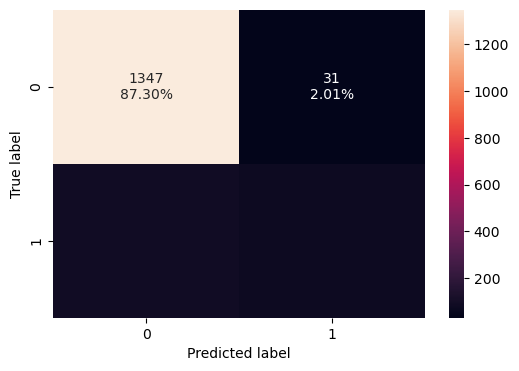

In [ ]:
model_confusion_matrix(LogisticReg, X_train_with_intercept, y_train)

In [ ]:
logistic_regression_perf_train = model_performance_classification(LogisticReg, X_train_with_intercept, y_train)
logistic_regression_perf_train

,Accuracy,Recall,Precision,F1
0,0.922229,0.460606,0.71028,0.558824


### Logistic Regression Model - Test Performance

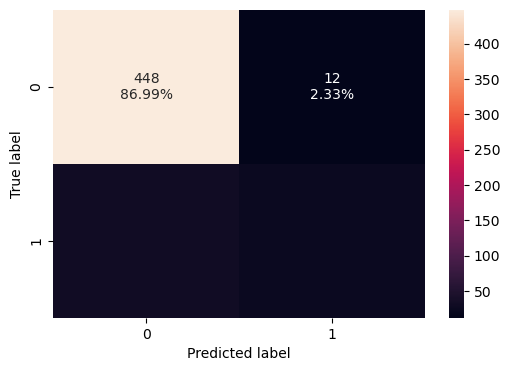

In [ ]:
model_confusion_matrix(LogisticReg, X_test_with_intercept, y_test)

In [ ]:
logistic_regression_perf_test = model_performance_classification(LogisticReg, X_test_with_intercept, y_test)
logistic_regression_perf_test

,Accuracy,Recall,Precision,F1
0,0.916505,0.436364,0.666667,0.527473


## Random Forest

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_model = rf_classifier.fit(X_train_scaled, y_train)

### Random Forest Model - Training Performance

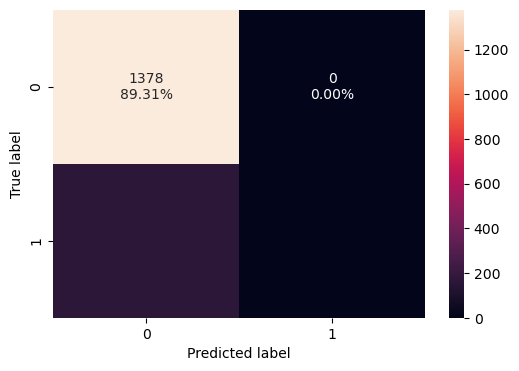

In [ ]:
model_confusion_matrix(rf_model, X_train, y_train)

In [ ]:
random_forest_perf_train = model_performance_classification(rf_model, X_train, y_train)
random_forest_perf_train

,Accuracy,Recall,Precision,F1
0,0.893065,0.0,0.0,0.0


### Random Forest Model - Test Performance

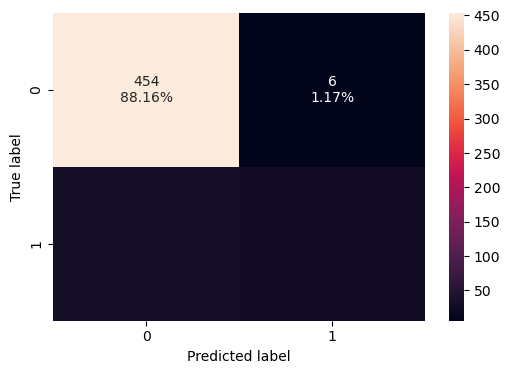

In [ ]:
model_confusion_matrix(rf_model, X_test_scaled, y_test)  ## Complete the code to create confusion matrix for test data

In [ ]:
random_forest_perf_test = model_performance_classification(rf_model, X_test_scaled, y_test)
random_forest_perf_test

,Accuracy,Recall,Precision,F1
0,0.932039,0.472727,0.8125,0.597701


# Model Performance Improvement

## Model Performance Improvement - Logistic Regression

In [ ]:
def calculate_vif(idf):
    """
    Calculate Variance Inflation Factor (VIF) for each variable in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing numerical variables.

    Returns:
    vif_df (DataFrame): DataFrame containing variable names and their corresponding VIF values.
    """
    variables = idf.values
    vif_df = pd.DataFrame()
    vif_df["Variable"] = idf.columns
    vif_df["VIF"] = [variance_inflation_factor(variables, i) for i in range(idf.shape[1])]
    return vif_df

In [ ]:
# Call the function to calculate VIF
vif_result = calculate_vif(X_train_scaled)

print("Variance Inflation Factors:")
vif_result

Variance Inflation Factors:


,Variable,VIF
0,Operating_Expense_Rate,1.259611
1,Research_and_development_expense_rate,1.099306
2,Cash_flow_rate,12.259184
3,Interest_bearing_debt_interest_rate,1.032597
4,Tax_rate_A,1.248346
5,Cash_Flow_Per_Share,4.564430
6,Per_Share_Net_profit_before_tax_Yuan_,8.756612
7,Realized_Sales_Gross_Profit_Growth_Rate,1.058517
8,Operating_Profit_Growth_Rate,1.152581
9,Continuous_Net_Profit_Growth_Rate,1.467948


In [ ]:
high_vif_columns = []
for i, row in vif_result.iterrows():
    if row['VIF'] >= 5:
        high_vif_columns.append(row['Variable'])
high_vif_columns

['Cash_flow_rate',
 'Per_Share_Net_profit_before_tax_Yuan_',
 'Cash_Reinvestment_perc',
 'Net_profit_before_tax_to_Paid_in_capital',
 'Total_Asset_Turnover',
 'Operating_Funds_to_Liability',
 'CFO_to_Assets']

In [ ]:
# Dropping columns with VIF > 5
X_train_scaled.drop(columns = high_vif_columns, axis=1, inplace=True)
X_test_scaled.drop(columns = high_vif_columns, axis=1, inplace=True)

In [ ]:
X_train_scaled.shape

(1543, 46)

In [ ]:
X_test_scaled.shape

(515, 46)

In [ ]:
X_train_new_with_intercept = SM.add_constant(X_train_scaled)
X_test_new_with_intercept = SM.add_constant(X_test_scaled)

In [ ]:
# Retraining Logistic Regression Model with new data
LogisticReg_improved =  SM.Logit(y_train, X_train_new_with_intercept).fit(method='bfgs',maxiter=100)

         Current function value: 0.201099
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1543
Model:                          Logit   Df Residuals:                     1496
Method:                           MLE   Df Model:                           46
Date:                Wed, 05 Feb 2025   Pseudo R-squ.:                  0.4086
Time:                        11:17:16   Log-Likelihood:                -310.30
converged:                      False   LL-Null:                       -524.71
Covariance Type:            nonrobust   LLR p-value:                 1.462e-63
                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------

In [ ]:
# Finding Optimal Threshold value
logit_y_pred = LogisticReg_improved.predict(X_train_new_with_intercept)
fpr, tpr, thresholds = roc_curve(y_train, logit_y_pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit = round(thresholds[optimal_idx], 3)
optimal_threshold_logit

0.084

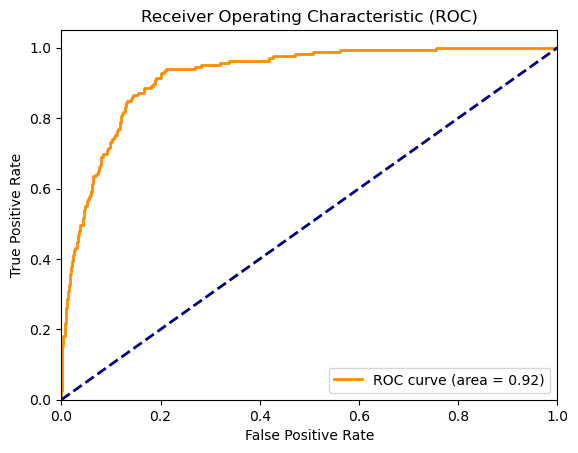

In [ ]:
roc_auc =  roc_auc_score(y_train, logit_y_pred)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression Performance - Training Set

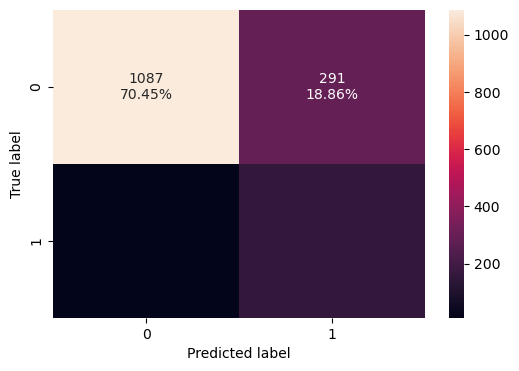

In [ ]:
model_confusion_matrix(LogisticReg_improved, X_train_new_with_intercept, y_train, optimal_threshold_logit)

In [ ]:
logistic_regression_tuned_perf_train = model_performance_classification(
    LogisticReg_improved, X_train_new_with_intercept, y_train, optimal_threshold_logit
)
logistic_regression_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.804277,0.933333,0.346067,0.504918


### Logistic Regression Performance - Test Set

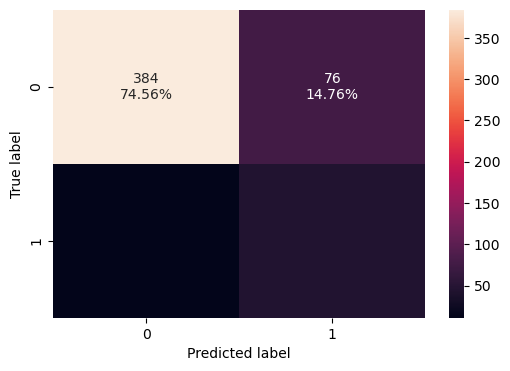

In [ ]:
model_confusion_matrix(LogisticReg_improved, X_test_new_with_intercept, y_test, optimal_threshold_logit)  ## Complete the code to create confusion matrix for test data

In [ ]:
logistic_regression_tuned_perf_test = model_performance_classification(LogisticReg_improved, X_test_new_with_intercept, y_test, optimal_threshold_logit)  ## Complete the code to check performance on test data
logistic_regression_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.831068,0.8,0.366667,0.502857


## Model Performance Improvement - Random Forest

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [5, 7, 9],    # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split a node
    'min_samples_leaf': [5, 6, 7],  # Minimum number of samples required at each leaf node
}

rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Access the best estimator directly if needed
best_rf_classifier = grid_search.best_estimator_

In [ ]:
params_used = best_rf_classifier.get_params()

# Print the parameters
print("Parameters used in the Random Forest Classifier:")
for param_name, param_value in params_used.items():
    print(f"{param_name}: {param_value}")

Parameters used in the Random Forest Classifier:
bootstrap: True
ccp_alpha: 0.0
class_weight: balanced
criterion: gini
max_depth: 5
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 7
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 200
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


### Random Forest Performance - Training Set

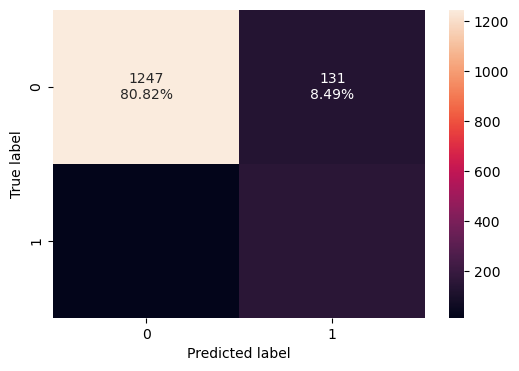

In [ ]:
model_confusion_matrix(best_rf_classifier, X_train_scaled, y_train)

In [ ]:
random_forest_tuned_perf_train = model_performance_classification(best_rf_classifier, X_train_scaled, y_train)
random_forest_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.906675,0.921212,0.537102,0.678571


### Random Forest Performance - Test Set

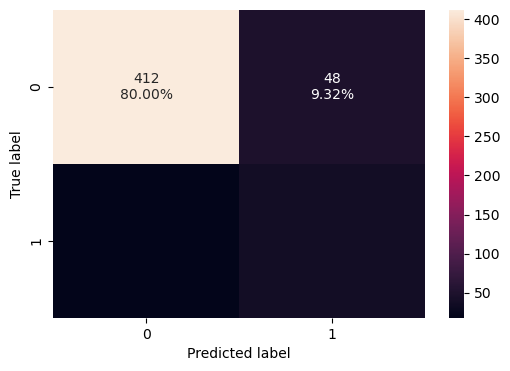

In [ ]:
model_confusion_matrix(best_rf_classifier, X_test_scaled, y_test)

In [ ]:
random_forest_tuned_perf_test = model_performance_classification(best_rf_classifier, X_test_scaled, y_test)
random_forest_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.871845,0.672727,0.435294,0.528571


# Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        logistic_regression_perf_train.T,
        logistic_regression_tuned_perf_train.T,
        random_forest_perf_train.T,
        random_forest_tuned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Tuned Logistic Regression",
    "Random Forest",
    "Tuned Random Forest",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression,Tuned Logistic Regression,Random Forest,Tuned Random Forest
Accuracy,0.922229,0.804277,0.893065,0.906675
Recall,0.460606,0.933333,0.000000,0.921212
Precision,0.710280,0.346067,0.000000,0.537102
F1,0.558824,0.504918,0.000000,0.678571


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_regression_perf_test.T,
        logistic_regression_tuned_perf_test.T,
        random_forest_perf_test.T,
        random_forest_tuned_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression",
    "Tuned Logistic Regression",
    "Random Forest",
    "Tuned Random Forest",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Logistic Regression,Tuned Logistic Regression,Random Forest,Tuned Random Forest
Accuracy,0.916505,0.831068,0.932039,0.871845
Recall,0.436364,0.800000,0.472727,0.672727
Precision,0.666667,0.366667,0.812500,0.435294
F1,0.527473,0.502857,0.597701,0.528571


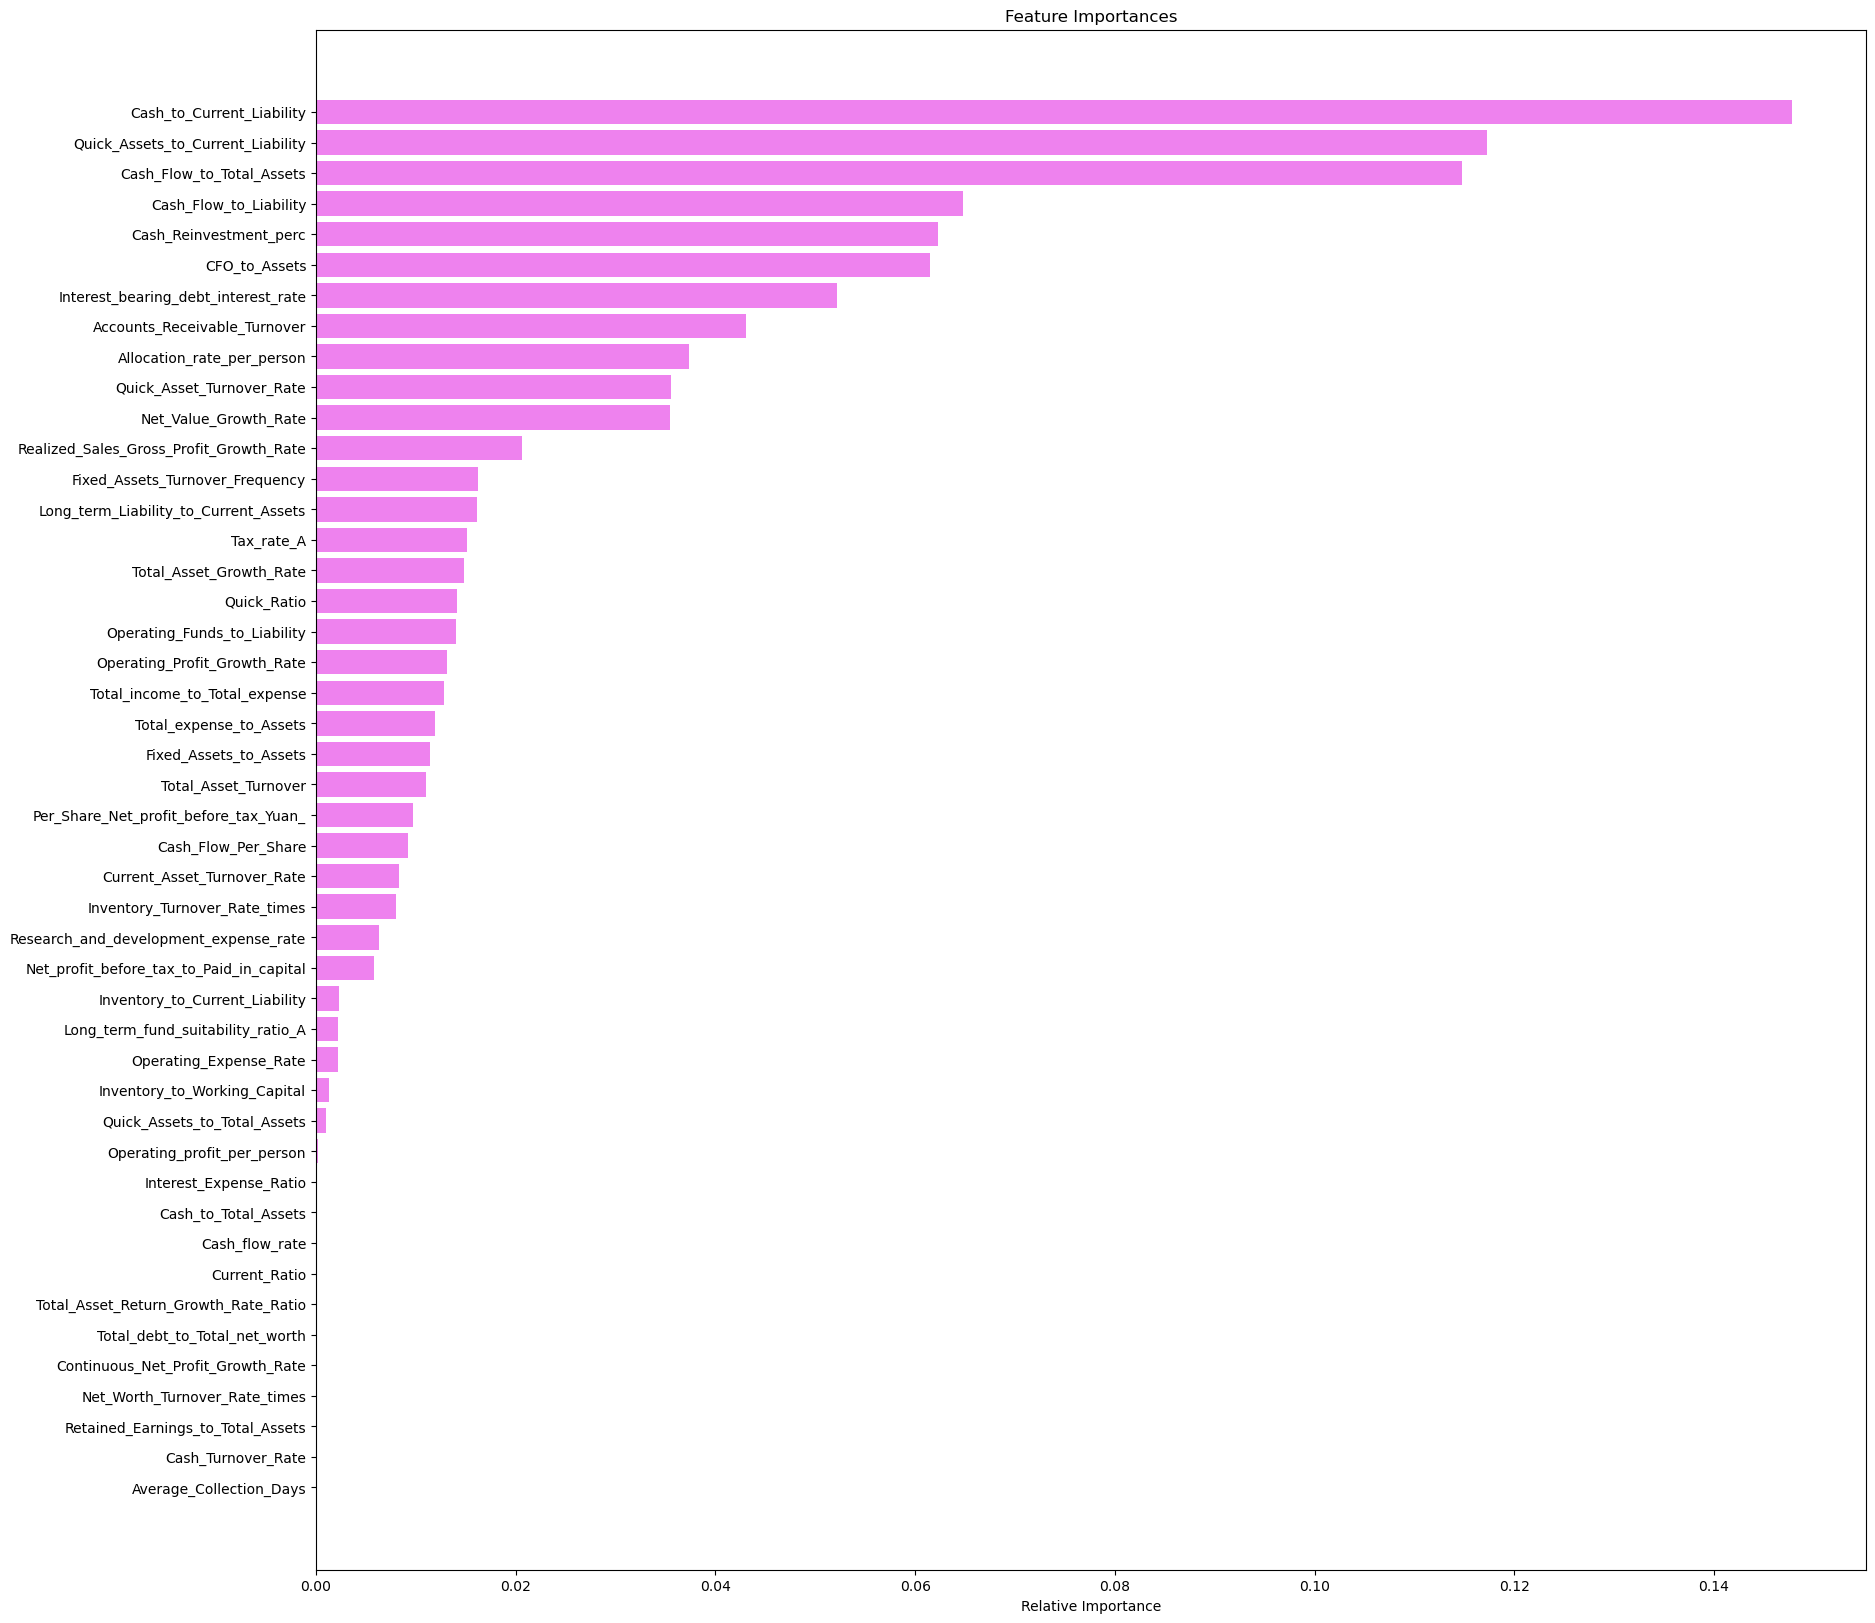

In [ ]:
feature_names = X_train.columns
importances = best_rf_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 20))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

*

___